<div style="border:solid blue 2px; padding: 20px">

 **Overall Summary of the Project**

Dear Michael,

Thank you for sharing your notebook on classifying Megaline users for the Smart or Ultra plan. Your notebook demonstrates attempts to train several models, experiment with hyperparameters, and assess performance metrics. Below are detailed strengths and recommendations to align this project more closely with best practices for classification tasks.

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Logical Data Splitting:</b> You split the dataset into training, validation, and test sets (60%-20%-20%), which ensures a clear demarcation for unbiased performance evaluation.</li>
  <li><b>Model Variety:</b> You investigated multiple approaches – including Decision Trees, Random Forest, and even Logistic Regression – offering a broad perspective on potential solutions.</li>
  <li><b>Hyperparameter Tuning Effort:</b> You experimented with parameters such as <code>max_depth</code>, <code>n_estimators</code>, and others, aiming to optimize model accuracy.</li>
  <li><b>Data Exploration & Visualization:</b> While limited, you did provide histograms and boxplots for features, as well as .info() and .describe() checks, giving some sense of the data’s distribution and shape.</li>
  <li><b>Classification Results:</b> The Random Forest classifier exceeded the 75% accuracy threshold (approx. 82.4%), meeting the project’s requirement for plan recommendation accuracy.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Areas for Improvement:</b>
<ul>
  <li><b>Clarify Use of Regression for Classification:</b> Parts of the notebook use regressors (<code>LinearRegression</code>, <code>DecisionTreeRegressor</code>, <code>RandomForestRegressor</code>) and measure <code>RMSE</code> for tasks that are framed as classification (predicting 0 vs. 1). For classification problems, metrics like <b>accuracy</b>, <b>Precision</b>, <b>Recall</b>, <b>F1-score</b>, and <b>ROC-AUC</b> are more appropriate. The code mixing regression models (RMSE) with classification tasks is inconsistent. Consider removing or clarifying the regression approach if your aim is purely classification.</li>
  <li><b>Expand EDA and Data Integrity Checks:</b> While you displayed .info() and .describe(), consider a more thorough check for duplicates, outliers, or correlation patterns. You mention “no notable issues found” but show only minimal exploration or correlation analysis. A correlation heatmap for classification might clarify feature relevance.</li>
  <li><b>Hyperparameter Tuning Depth:</b> You tested ranges for <code>max_depth</code> and <code>n_estimators</code>, but advanced search techniques (<code>GridSearchCV</code> or <code>RandomizedSearchCV</code>) and exploring additional parameters (e.g., <code>min_samples_leaf</code>, <code>max_features</code>) might yield further gains in accuracy or reduce overfitting.</li>
  <li><b>Evaluate Class Imbalance:</b> If “Ultra” is the minority class, consider setting <code>class_weight='balanced'</code> or using oversampling/undersampling methods, especially if you notice performance differences for the minority plan in confusion matrices.</li>
  <li><b>Comprehensive Model Evaluation:</b> Provide confusion matrices and classification reports for each model variant you test, not just the final approach. This helps confirm which model is truly best and how it handles each class.</li>
  <li><b>Cleanly Summarize Final Results:</b> The results DataFrame includes regression-based metrics (RMSE) for a classification scenario. Consider focusing on classification metrics, providing a unified summary comparing final accuracy across all classification models tested.</li>
</ul>
</div>

---

**Conclusion**

Your project effectively arrives at a working Random Forest classifier that surpasses the 75% accuracy criterion for recommending Megaline’s plans. However, the intermixing of regression models and RMSE for a binary classification problem is out of scope for the stated goal. By refining your approach to focus on classification metrics and ensuring consistent EDA, data checks, and hyperparameter tuning, you’ll have a more coherent pipeline. With these adjustments, your final solution will be more robust, interpretable, and aligned with best practices for classification tasks.

**Next Steps for Future Improvement**

1. **Focus on Classification Metrics:**  
   Remove or clarify regressors (<code>LinearRegression</code>, <code>DecisionTreeRegressor</code>, <code>RandomForestRegressor</code>) and measure <code>accuracy</code>, <code>precision</code>, <code>recall</code>, <code>F1-score</code>, or <code>ROC-AUC</code> to evaluate your classification model comprehensively.

2. **Enhanced Data Exploration & Checks:**  
   Perform thorough correlation/duplicate/outlier analyses and confirm no data anomalies remain unaddressed.

3. **Extend Hyperparameter Searches:**  
   Use <code>GridSearchCV</code> or <code>RandomizedSearchCV</code> to systematically optimize <code>min_samples_leaf</code>, <code>max_features</code>, etc.

4. **Address Class Imbalance (if any):**  
   If “Ultra” is less frequent, try <code>class_weight='balanced'</code> or sampling methods to improve minority class performance.

5. **Unified Report of Classification Models:**  
   Summarize each classifier’s accuracy (or other relevant metrics) side by side, clarifying the rationale for your final selection.

By focusing on classification-specific techniques and metrics, plus deeper data checks, your final solution can be more accurate, interpretable, and consistent with best ML practices for plan recommendation tasks.

</div>

# Title: Megaline Subscriber Plan Model

# Description:
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. 

You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.  

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

# Procedure:
- Read data
- Verify data integrity
- Split the data into a training, validation, and testing sets
- Create models and tune the hyperparameters to find the best fit
- Check the quality of the model using the test set.

In [45]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Open and look through the data file.

In [46]:
# Read Data

df = pd.read_csv('/datasets/users_behavior.csv')

Look through the data file:

In [47]:
print(df.head(5))

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


- 'messages' could be int
- 'is_ultra' could be bool

In [49]:
print(df.describe())

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000


In [50]:
print('Null entries:')
print(df.isna().sum())

Null entries:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [51]:
print('Duplicated rows:')
print(df.duplicated().sum())

Duplicated rows:
0


# Graphs

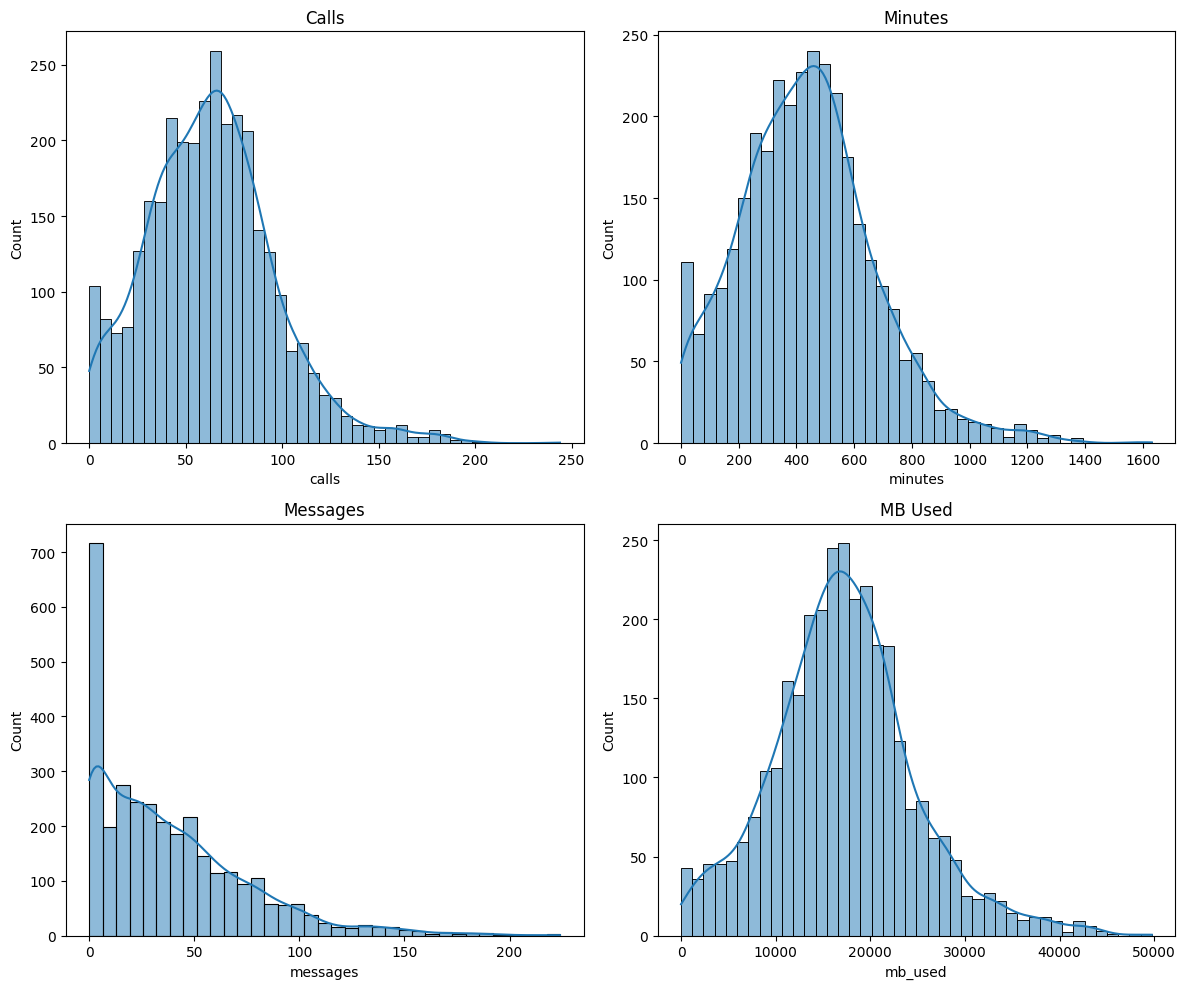

In [52]:
# distribution 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

sns.histplot(data=df, x="calls", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="minutes", kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="messages", kde=True, ax=axes[1, 0])
sns.histplot(data=df, x="mb_used", kde=True, ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title('Calls')
axes[0, 1].set_title('Minutes')
axes[1, 0].set_title('Messages')
axes[1, 1].set_title('MB Used')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

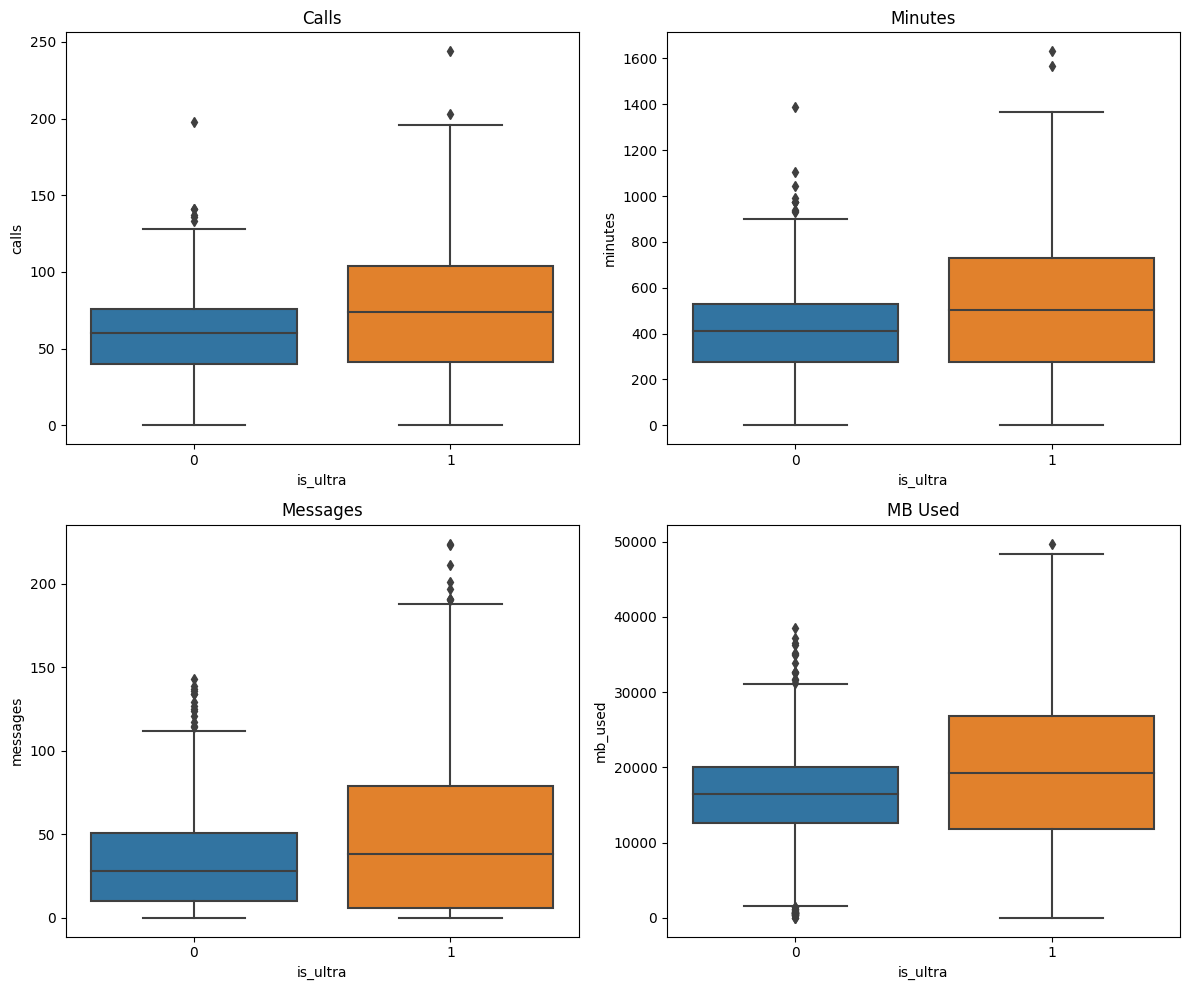

In [53]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

sns.boxplot(x='is_ultra', y='calls', data=df, ax=axes[0, 0])
sns.boxplot(x='is_ultra', y='minutes', data=df, ax=axes[0, 1])
sns.boxplot(x='is_ultra', y='messages', data=df, ax=axes[1, 0])
sns.boxplot(x='is_ultra', y='mb_used', data=df, ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title('Calls')
axes[0, 1].set_title('Minutes')
axes[1, 0].set_title('Messages')
axes[1, 1].set_title('MB Used')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Split the source data into a training set, a validation set, and a test set.

In [54]:
# Split the source data into a training, validation, and test set
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=42)

# Features and targets for each dataset
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [55]:
# Checking Shapes
print('Training set:')
print(features_train.shape)
print(target_train.shape)
print()
print('Validation set:')
print(features_valid.shape)
print(target_valid.shape)
print()
print('Test set:')
print(features_test.shape)
print(target_test.shape)

Training set:
(1928, 4)
(1928,)

Validation set:
(643, 4)
(643,)

Test set:
(643, 4)
(643,)


In [56]:
# Creating a df to track results

results= pd.DataFrame(columns=['model', 'rmse_validation', 'rmse_test', 'accuracy'])

# Linear Regression

In [57]:
# Check LinearRegression

model = LinearRegression() # initialize model constructor
model.fit(features_train, target_train) # train model on training set
predictions_valid = model.predict(features_valid) # get model predictions on validation set

result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
print(f"RMSE of the linear regression model on the validation set: {result:.2f}")

results.loc[len(results)] = ['Linear Regression', result, np.nan, np.nan]


RMSE of the linear regression model on the validation set: 0.44


# Decision Tree

In [58]:
# Check DecisionTreeRegressor

best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 16): # choose hyperparameter range
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)# train model on training set
    model.fit(features_train, target_train) # train model on training set
    predictions_valid = model.predict(features_valid) # get model predictions on validation set
    result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(f"RMSE of the best decision tree model on the validation set (max_depth = {best_depth}): {best_result:.2f}")

results.loc[len(results)] = ['Decision Tree Regression', best_result, np.nan, np.nan]


RMSE of the best decision tree model on the validation set (max_depth = 4): 0.41


In [59]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid) # get model predictions on validation set

result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
print(f"RMSE of the Decision Tree Classifier model on the validation set: {result:.2f}")

test_predictions = model.predict(features_test)
result_test = mean_squared_error(target_test, test_predictions)**0.5
print(f"RMSE of the best model on the test set: {result_test:.2f}")
accuracy_test = accuracy_score(target_test, test_predictions)
print(f'Accuracy of the test set: {accuracy_test:.3f}') 

results.loc[len(results)] = ['Decision Tree Classifier', result, result_test, accuracy_test]


RMSE of the Decision Tree Classifier model on the validation set: 0.47
RMSE of the best model on the test set: 0.46
Accuracy of the test set: 0.790


RMSE of the Decision Tree Classifier model on the validation set: 0.47
RMSE of the best model on the test set: 0.46
Accuracy of the test set: 0.790

The accuracy of the model is above the threshold.
The RMSE of the validation and test sets are very similar, indicating a close fit.

# Random Forest

In [60]:
#Check RandomForestRegressor

best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(max_depth=depth, random_state=42, n_estimators=est)# initialize model constructor with parameters random_state=12345 and n_estimators=est
        model.fit(features_train, target_train) # train model on training set
        predictions_valid = model.predict(features_valid) # get model predictions on validation set
        result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print(f"RMSE of the best model on the validation set: {best_result:.3f} n_estimators: {best_est} best_depth: {best_depth}")

results.loc[len(results)] = ['Random Forest Regressor', best_result, np.nan, np.nan]


RMSE of the best model on the validation set: 0.384 n_estimators: 50 best_depth: 8


In [61]:

# Initialize the Random Forest model
model = RandomForestClassifier(max_depth=best_depth, n_estimators=best_est, random_state=42)

# Train the model
model.fit(features_train, target_train)

# Make predictions on the test data
predictions_test = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(target_test, predictions_test)

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid) # get model predictions on validation set

result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
print(f"RMSE of the Random Forest Classifier model on the validation set: {result:.2f}")
result_test = mean_squared_error(target_test, predictions_test)**0.5
print(f"RMSE of the best model on the test set: {result_test:.2f}")
print(f'Test Accuracy: {accuracy:.3f}')

results.loc[len(results)] = ['Random Forest Classifier', result, result_test, accuracy]


RMSE of the Random Forest Classifier model on the validation set: 0.45
RMSE of the best model on the test set: 0.42
Test Accuracy: 0.824


In [62]:
best_accuracy_score = 0
best_estimator = 0

# Use the validation set for hyperparameter tuning
for k in range(1, 51):
    model = RandomForestClassifier(max_depth=best_depth, random_state=42, n_estimators=k)
    model.fit(features_train, target_train)
    validation_prediction = model.predict(features_valid)
    accuracy_validation = accuracy_score(target_valid, validation_prediction)
    
    if accuracy_validation > best_accuracy_score:
        best_accuracy_score = accuracy_validation
        best_estimator = k
        
# Retrain the model using the best hyperparameters on the combined training and validation sets
final_model = RandomForestClassifier(max_depth=best_depth, random_state=42, n_estimators=best_estimator)
final_model.fit(features_train.append(features_valid), target_train.append(target_valid))  
test_prediction = final_model.predict(features_test)  
accuracy_test = accuracy_score(target_test, test_prediction)

result = mean_squared_error(target_valid, predictions_valid)**0.5# calculate RMSE on validation set
print(f"RMSE of the best model on the validation set: {result:.2f}")
result_test = mean_squared_error(target_test, test_prediction)**0.5
print(f"RMSE of the best model on the test set: {result_test:.2f}")

print(f"Final Model Test Set Accuracy: {accuracy_test:.3f} with n_estimators: {best_estimator} and max_depth {best_depth}.")


RMSE of the best model on the validation set: 0.45
RMSE of the best model on the test set: 0.42
Final Model Test Set Accuracy: 0.820 with n_estimators: 13 and max_depth 8.


RMSE of the Random Forest Classifier model on the validation set: 0.45
RMSE of the best model on the test set: 0.42
Test Accuracy: 0.824

The accuracy of the model is above the threshold.
The RMSE of the validation and test sets are very similar, indicating a close fit.

In [63]:
print(results)

                      model  rmse_validation  rmse_test  accuracy
0         Linear Regression         0.443980        NaN       NaN
1  Decision Tree Regression         0.408649        NaN       NaN
2  Decision Tree Classifier         0.468278   0.458207  0.790047
3   Random Forest Regressor         0.383592        NaN       NaN
4  Random Forest Classifier         0.446169   0.419212  0.824261


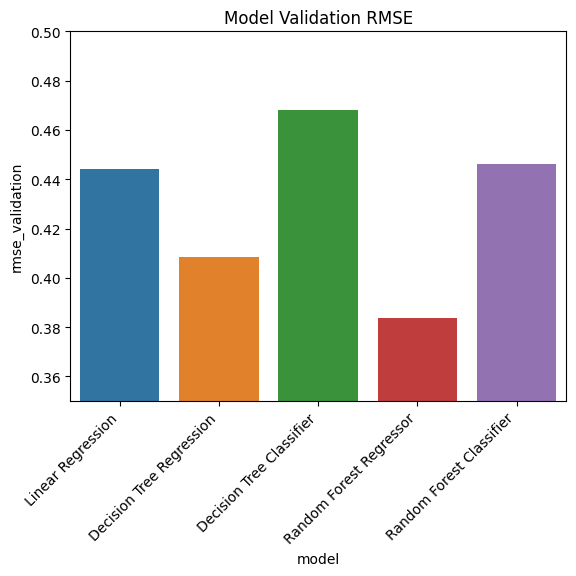

In [64]:
sns.barplot(data=results, x='model', y='rmse_validation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.35, 0.5)
plt.title('Model Validation RMSE')
plt.show()

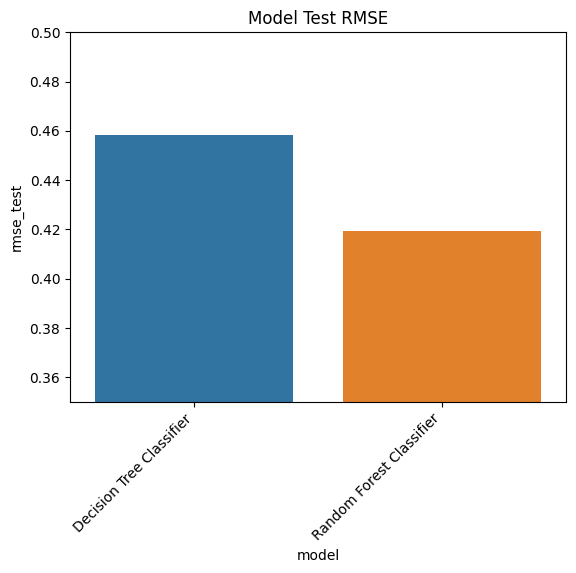

In [65]:
sns.barplot(data=results[results['rmse_test']>0], x='model', y='rmse_test')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.35, 0.5)
plt.title('Model Test RMSE')
plt.show()

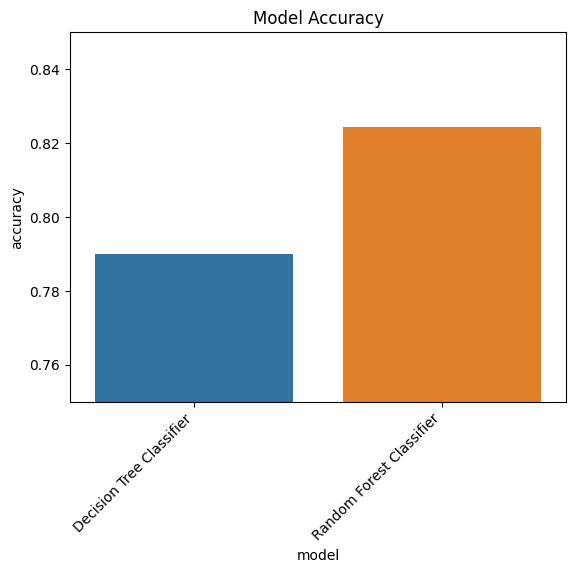

In [66]:
sns.barplot(data=results[results['accuracy']>0], x='model', y='accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.75, 0.85)
plt.title('Model Accuracy')

plt.show()

# Conclusion

The data file provided was read and examined with no noteable issues found.
The data was split into three sets for training, validation, and testing.
Various models were used to find the most accurate:

# Linear regression:
RMSE of the linear regression model on the validation set: 0.44

# Decision Tree

RMSE of the best decision tree model on the validation set (max_depth = 4): 0.41

RMSE of the Decision Tree Classifier model on the validation set: 0.47
RMSE of the best model on the test set: 0.46
Accuracy of the test set: 0.790

The accuracy of the model is above the threshold.
The RMSE of the validation and test sets are very similar, indicating a close fit.

# Random Forest

RMSE of the best random forest regression model on the validation set: 0.384 n_estimators: 50 best_depth: 8

RMSE of the Random Forest Classifier model on the validation set: 0.45
RMSE of the best model on the test set: 0.42
Test Accuracy: 0.824
